In [2]:
import pandas as pd
import os

dataset_path = 'Z:/per-coolyeah-an/pengolahan-citra-dan-visi-komputer/Image_Processing/uas-pcvk/PROJECT_Data' # enih pathnya diganti

ids = sorted(list(set([filename[:12] for filename in os.listdir(dataset_path)]))) # ngok
len(ids)

df = pd.read_csv('dataset.csv')

In [1]:
def visualize(dataset, features):
    import matplotlib.pyplot as plt
    from itertools import combinations

    feature_pairs = list(combinations(features, 2))

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

    axes = axes.flatten()

    for i, (x_feature, y_feature) in enumerate(feature_pairs):
        ax = axes[i]
        for melanoma_class in [0, 1]:
            subset = dataset[dataset['melanoma'] == melanoma_class]
            color = 'red' if melanoma_class == 1 else 'blue'
            label = 'Melanoma' if melanoma_class == 1 else 'Non-melanoma'
            ax.scatter(subset[x_feature], subset[y_feature], c=color, label=label, alpha=0.5)
        
        ax.set_xlabel(x_feature)
        ax.set_ylabel(y_feature)
        ax.legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

# visualize(df, ['asymmetry', 'border_irregularity', 'color_irregularity', 'differential_structure'])

In [3]:
melanoma = df[df['melanoma'] == 1]
non_melanoma = df[df['melanoma'] == 0]

In [4]:
def display_img(image_id):
    import cv2
    import matplotlib.pyplot as plt

    image1 = cv2.imread(f'{dataset_path}/{image_id}.jpg')
    image2 = cv2.imread(f'{dataset_path}/{image_id}_segmentation.png')
    image3 = cv2.imread(f'{dataset_path}/{image_id}_superpixels.png')

    # Convert BGR images to RGB
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
    image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    # Display images in subplots
    axes[0].imshow(image1_rgb)
    axes[0].set_title('Original ' + image_id)
    axes[0].axis('off')  # Hide axes for better visualization

    axes[1].imshow(image2_rgb)
    axes[1].set_title('Segmented')
    axes[1].axis('off')

    axes[2].imshow(image3_rgb)
    axes[2].set_title('Superpixels')
    axes[2].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()


In [5]:
import feature_extraction_experiments as bjir2

temp = {
    'std_hue'        : [],
    'std_saturation' : [],
    'symmetry'       : [],
    'area'           : [],
    'melanoma': [],
    'image_id': []
}

for i in range(200):
    image_id = df.iloc[i]['image_id']

    temp['melanoma'].append(df.iloc[i]['melanoma'])
    temp['image_id'].append(image_id)

    image_features = bjir2.get_features(dataset_path, image_id)
    for feature_name in image_features:
        temp[feature_name].append(image_features[feature_name])

df2 = pd.DataFrame(temp)
df2.to_csv('dataset2.csv')

visualize(df2, ['std_hue', 'std_saturation', 'symmetry', 'area'])

KeyError: 'area'

Unnamed: 0                           2
image_id                  ISIC_0000002
melanoma                             1
asymmetry                     0.003091
border_irregularity           1.973328
color_irregularity           27.861042
differential_structure        0.000004
Name: 2, dtype: object
{'std_hue': 76.00418199873474, 'std_saturation': 30.33465591218829, 'symmetry': 0.7705608944161799}


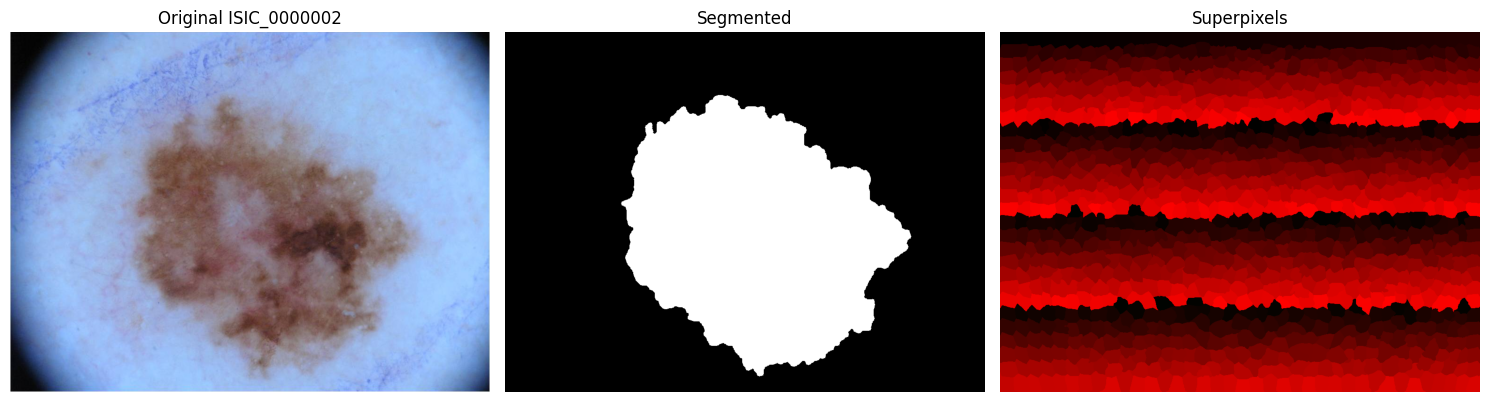


Unnamed: 0                           4
image_id                  ISIC_0000004
melanoma                             1
asymmetry                      0.00296
border_irregularity           1.202164
color_irregularity           34.173329
differential_structure        0.000004
Name: 4, dtype: object
{'std_hue': 15.4922003428768, 'std_saturation': 37.51399184847007, 'symmetry': 0.8625320992443977}


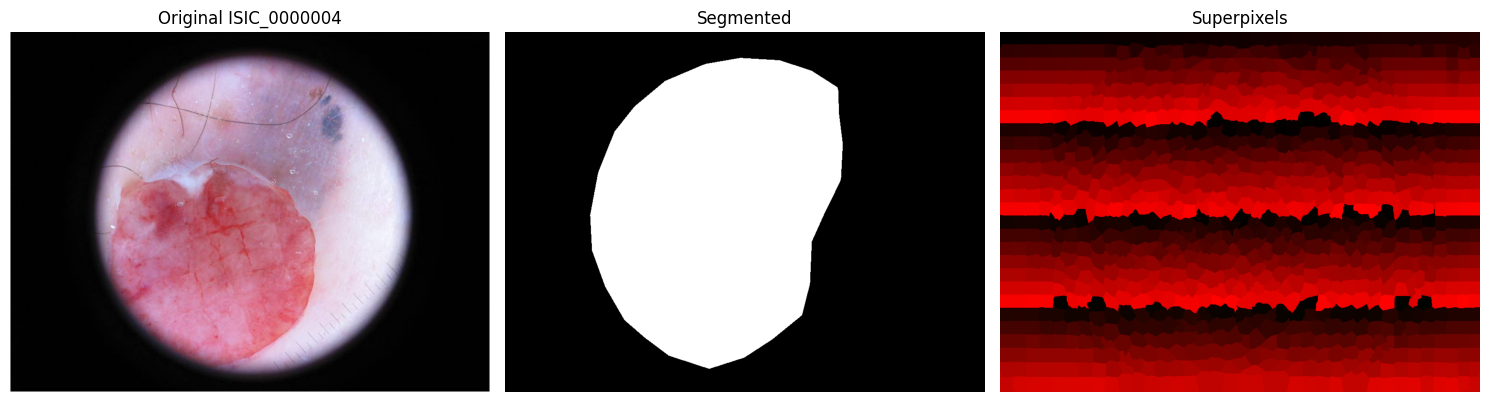


Unnamed: 0                          12
image_id                  ISIC_0000013
melanoma                             1
asymmetry                     0.002174
border_irregularity           1.526732
color_irregularity           39.442081
differential_structure        0.000005
Name: 12, dtype: object
{'std_hue': 18.406041937058813, 'std_saturation': 41.40388071695673, 'symmetry': 0.7819420871530053}


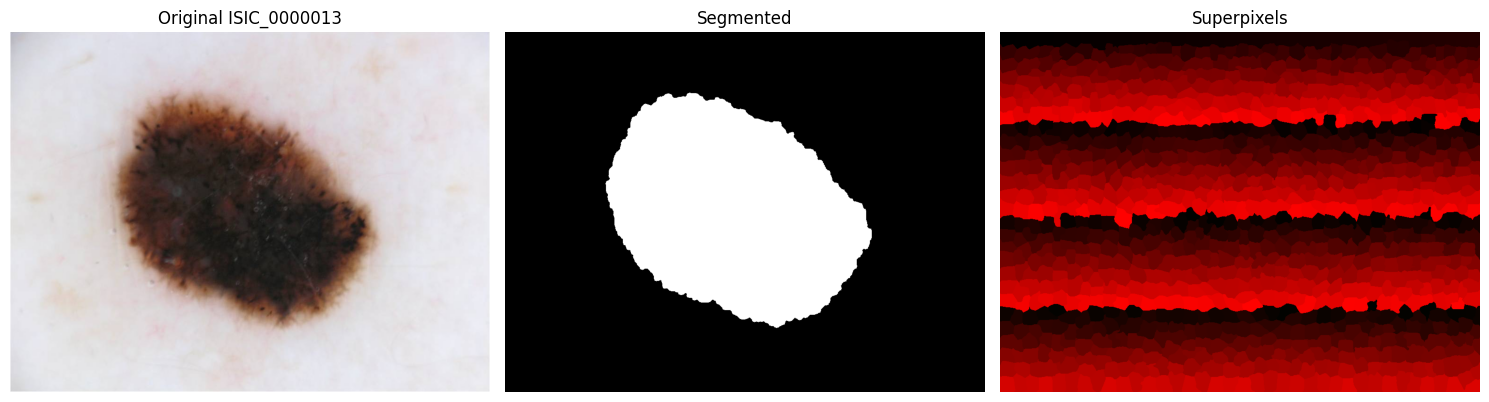


Unnamed: 0                          21
image_id                  ISIC_0000022
melanoma                             1
asymmetry                     0.003796
border_irregularity           1.298684
color_irregularity           32.367115
differential_structure        0.000001
Name: 21, dtype: object
{'std_hue': 58.12092055885482, 'std_saturation': 54.80099396630804, 'symmetry': 0.6214944561014837}


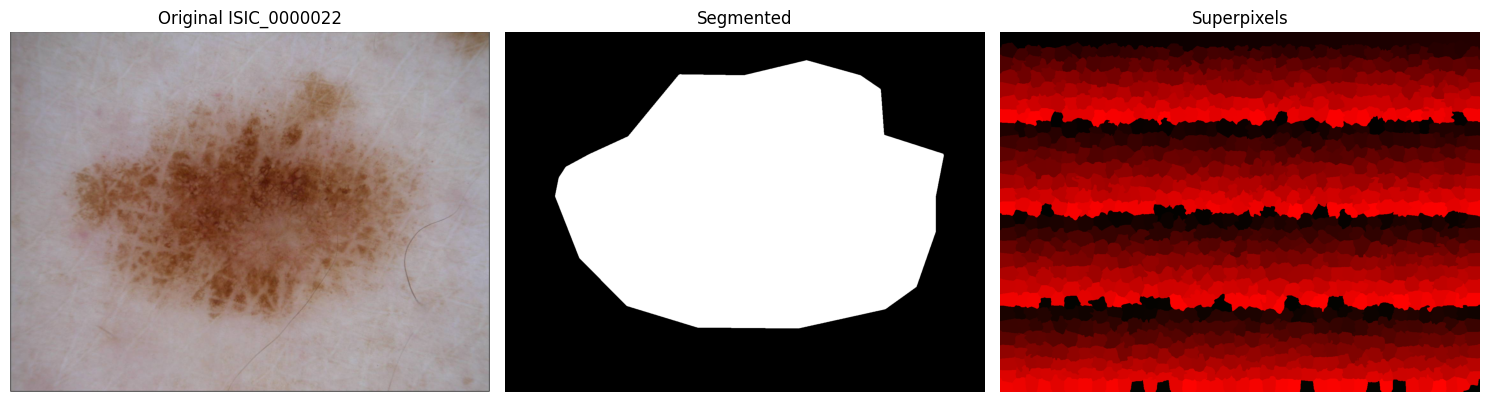


Unnamed: 0                          25
image_id                  ISIC_0000026
melanoma                             1
asymmetry                     0.002698
border_irregularity            1.31113
color_irregularity           19.337905
differential_structure        0.000001
Name: 25, dtype: object
{'std_hue': 80.64659797823879, 'std_saturation': 29.943393731292538, 'symmetry': 0.7330115594871405}


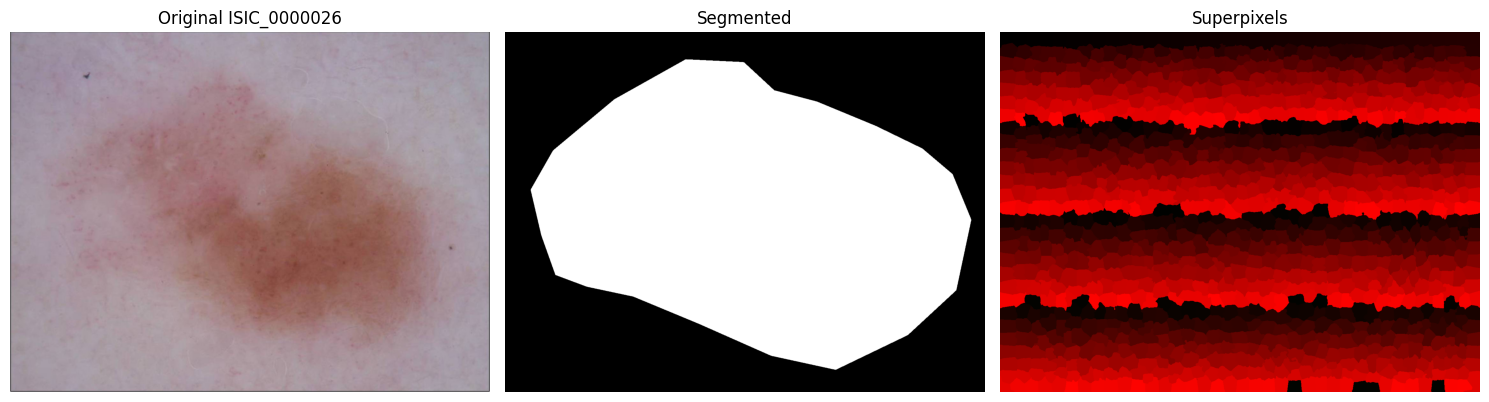


Unnamed: 0                          28
image_id                  ISIC_0000029
melanoma                             1
asymmetry                     0.002017
border_irregularity           1.787817
color_irregularity           32.505991
differential_structure        0.000002
Name: 28, dtype: object
{'std_hue': 43.856261368283285, 'std_saturation': 28.973656483782378, 'symmetry': 0.6960809222367793}


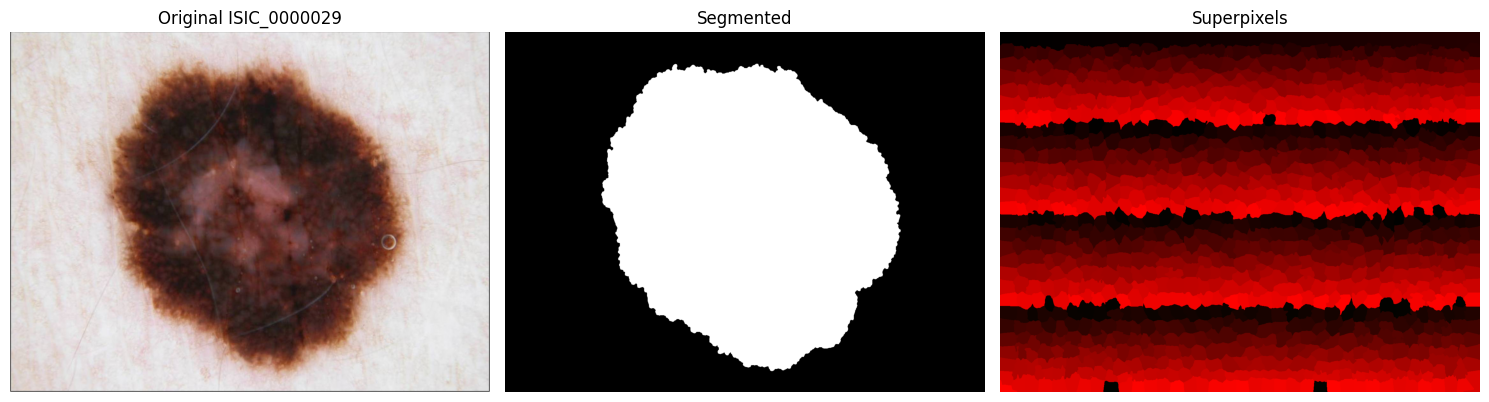


Unnamed: 0                          29
image_id                  ISIC_0000030
melanoma                             1
asymmetry                     0.001027
border_irregularity           1.261568
color_irregularity           50.515435
differential_structure        0.000001
Name: 29, dtype: object
{'std_hue': 24.354152052875822, 'std_saturation': 38.000609930980744, 'symmetry': 0.6832090074239877}


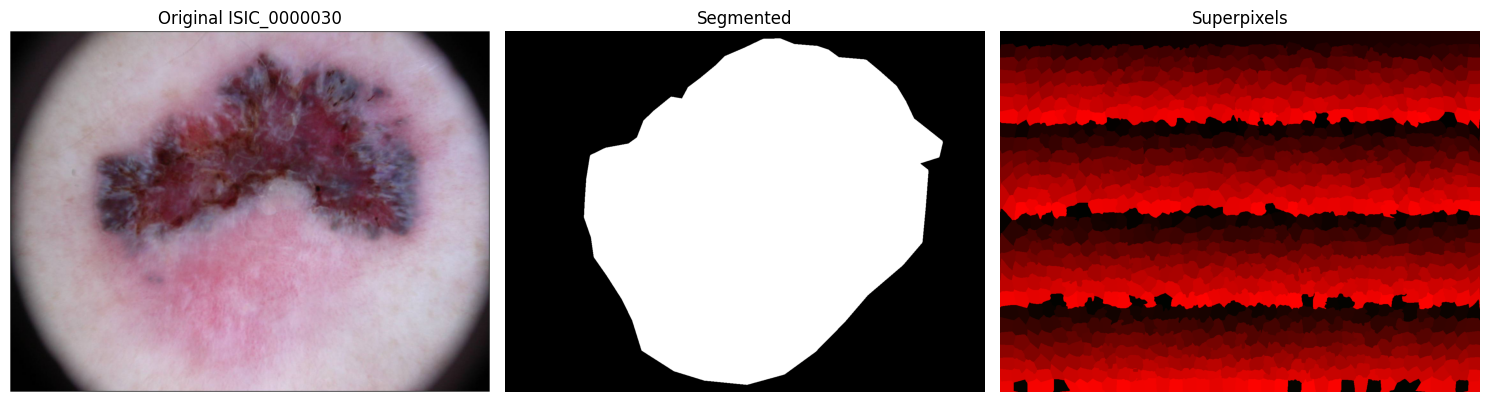


Unnamed: 0                          30
image_id                  ISIC_0000031
melanoma                             1
asymmetry                     0.003941
border_irregularity           1.386292
color_irregularity           42.887508
differential_structure        0.000002
Name: 30, dtype: object
{'std_hue': 81.83791550409332, 'std_saturation': 48.994255968464955, 'symmetry': 0.8462226272432803}


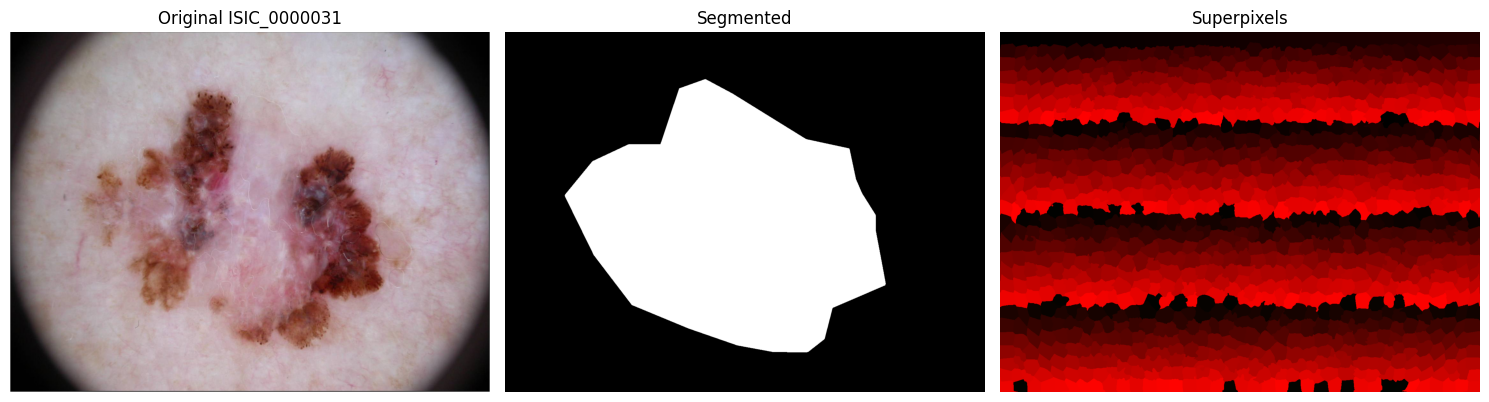


Unnamed: 0                          33
image_id                  ISIC_0000035
melanoma                             1
asymmetry                     0.001695
border_irregularity           1.828284
color_irregularity           22.034954
differential_structure        0.000001
Name: 33, dtype: object
{'std_hue': 23.849704313105423, 'std_saturation': 12.11800434144718, 'symmetry': 0.7593896186975746}


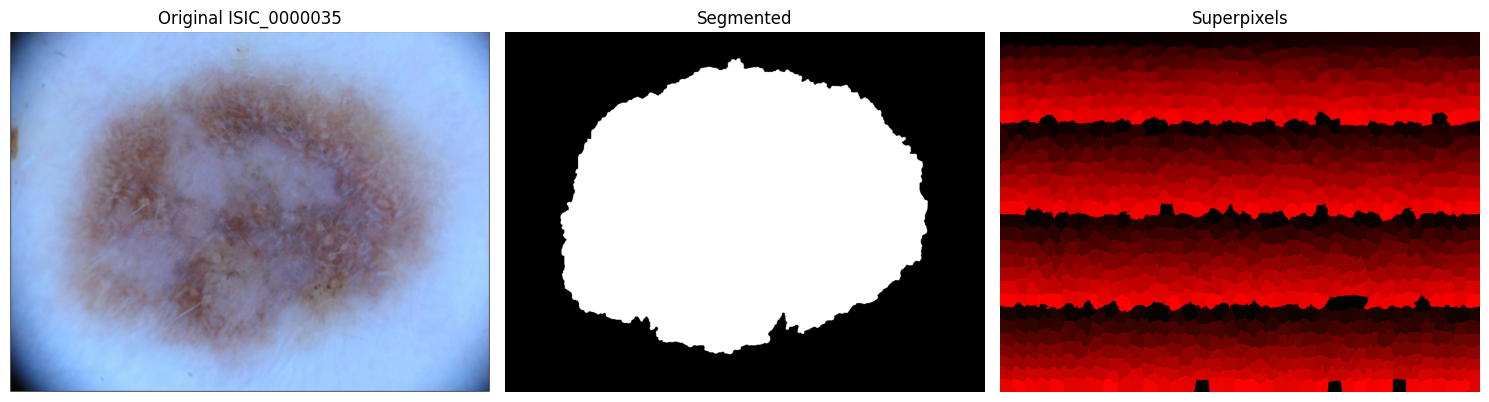


Unnamed: 0                          34
image_id                  ISIC_0000036
melanoma                             1
asymmetry                     0.005148
border_irregularity           1.363146
color_irregularity           45.737372
differential_structure        0.000002
Name: 34, dtype: object
{'std_hue': 28.766971084192537, 'std_saturation': 15.56673088328886, 'symmetry': 0.8579114043071738}


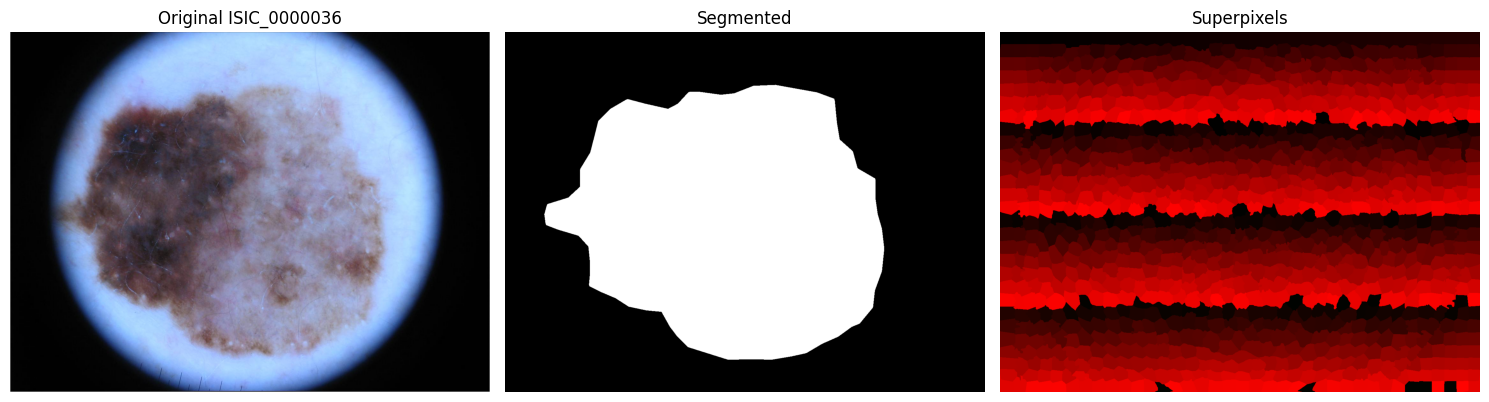

In [10]:
for i in range(10):
    img = melanoma.iloc[i]
    print(img)
    print(bjir2.get_features(dataset_path, img['image_id']))
    display_img(img['image_id'])
    print()

Unnamed: 0                           0
image_id                  ISIC_0000000
melanoma                             0
asymmetry                     0.008072
border_irregularity           1.463696
color_irregularity            39.36934
differential_structure        0.000003
Name: 0, dtype: object
{'std_hue': 59.18525907469297, 'std_saturation': 14.431452122782789, 'symmetry': 0.7580380841167627}


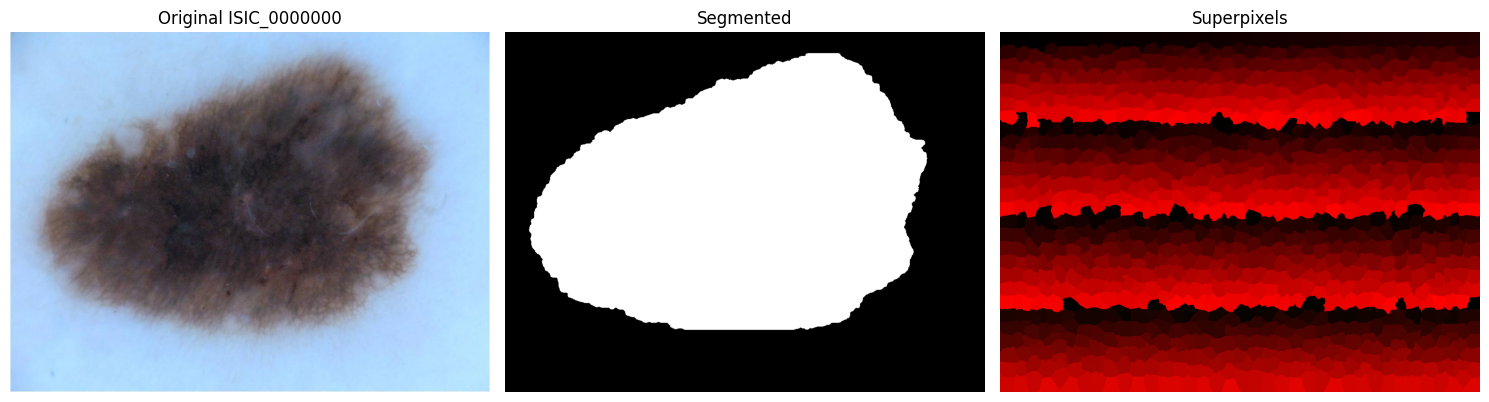


Unnamed: 0                           1
image_id                  ISIC_0000001
melanoma                             0
asymmetry                     0.001034
border_irregularity           1.716384
color_irregularity           25.947679
differential_structure        0.000019
Name: 1, dtype: object
{'std_hue': 13.677679736903814, 'std_saturation': 24.662210912078084, 'symmetry': 0.3183188738230452}


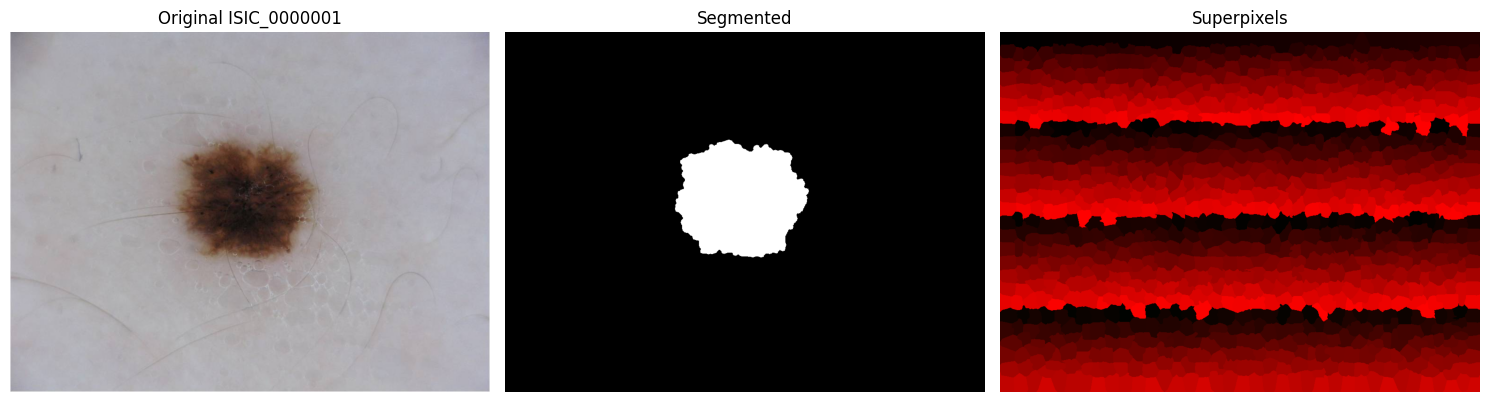


Unnamed: 0                           3
image_id                  ISIC_0000003
melanoma                             0
asymmetry                     0.003943
border_irregularity           1.465988
color_irregularity           33.612228
differential_structure        0.000004
Name: 3, dtype: object
{'std_hue': 5.052573504000407, 'std_saturation': 29.446578335265105, 'symmetry': 0.5389029468228433}


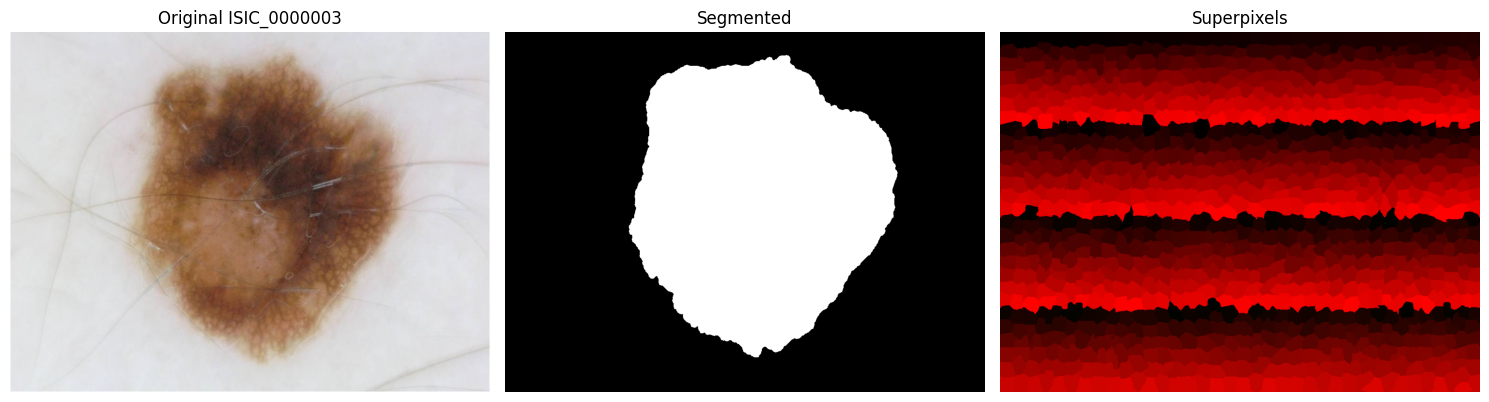


Unnamed: 0                           5
image_id                  ISIC_0000006
melanoma                             0
asymmetry                     0.003698
border_irregularity           1.866792
color_irregularity           25.160814
differential_structure        0.000014
Name: 5, dtype: object
{'std_hue': 45.39255497769881, 'std_saturation': 46.44511474602045, 'symmetry': 0.5267873677013148}


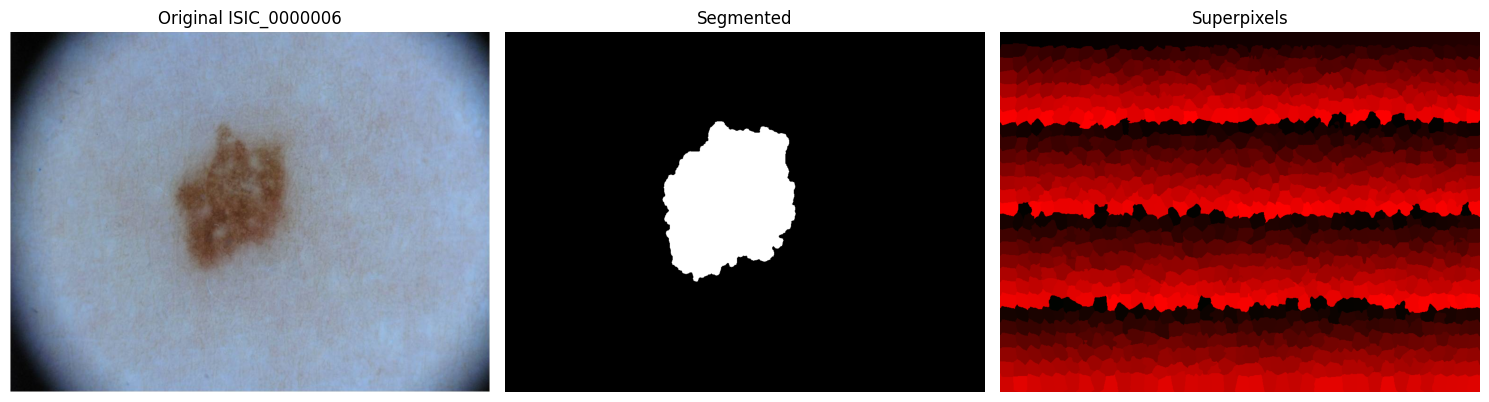


Unnamed: 0                           6
image_id                  ISIC_0000007
melanoma                             0
asymmetry                     0.001803
border_irregularity           1.438308
color_irregularity           25.781187
differential_structure        0.000015
Name: 6, dtype: object
{'std_hue': 45.90394155875392, 'std_saturation': 41.99878159850531, 'symmetry': 0.409941348973607}


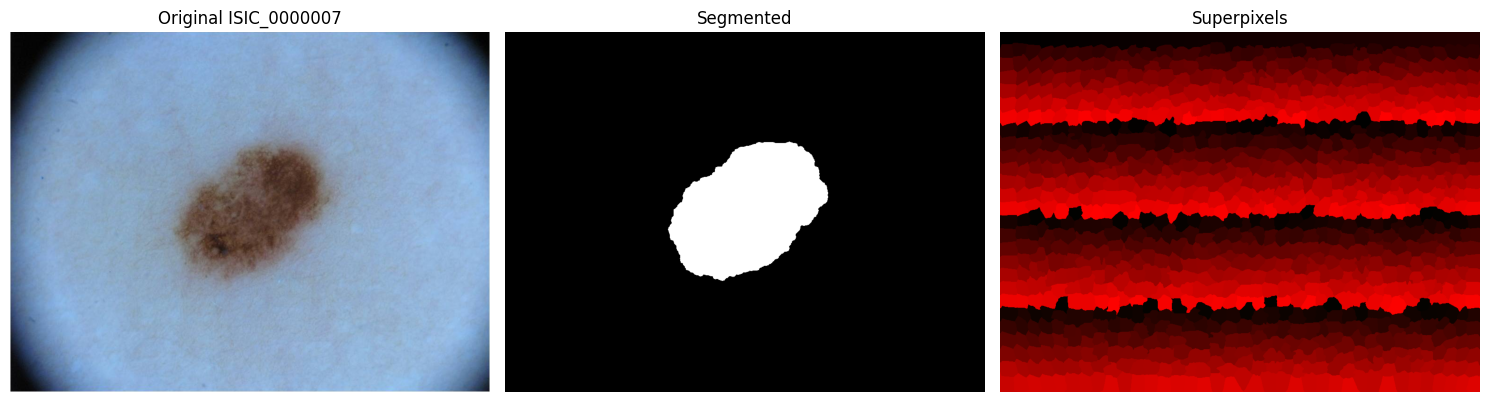


Unnamed: 0                           7
image_id                  ISIC_0000008
melanoma                             0
asymmetry                     0.001257
border_irregularity           1.645303
color_irregularity           33.419946
differential_structure        0.000004
Name: 7, dtype: object
{'std_hue': 12.848447008814148, 'std_saturation': 33.827742414426766, 'symmetry': 0.8142377820299691}


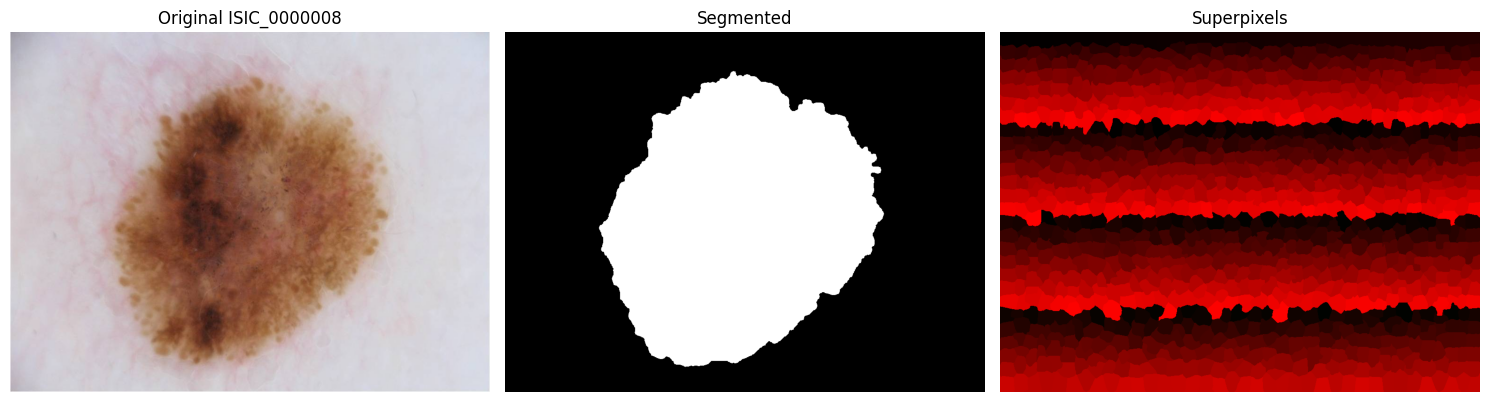


Unnamed: 0                           8
image_id                  ISIC_0000009
melanoma                             0
asymmetry                     0.001735
border_irregularity           1.750155
color_irregularity           25.109866
differential_structure        0.000006
Name: 8, dtype: object
{'std_hue': 5.543205716099939, 'std_saturation': 35.86001278080805, 'symmetry': 0.9174642015083023}


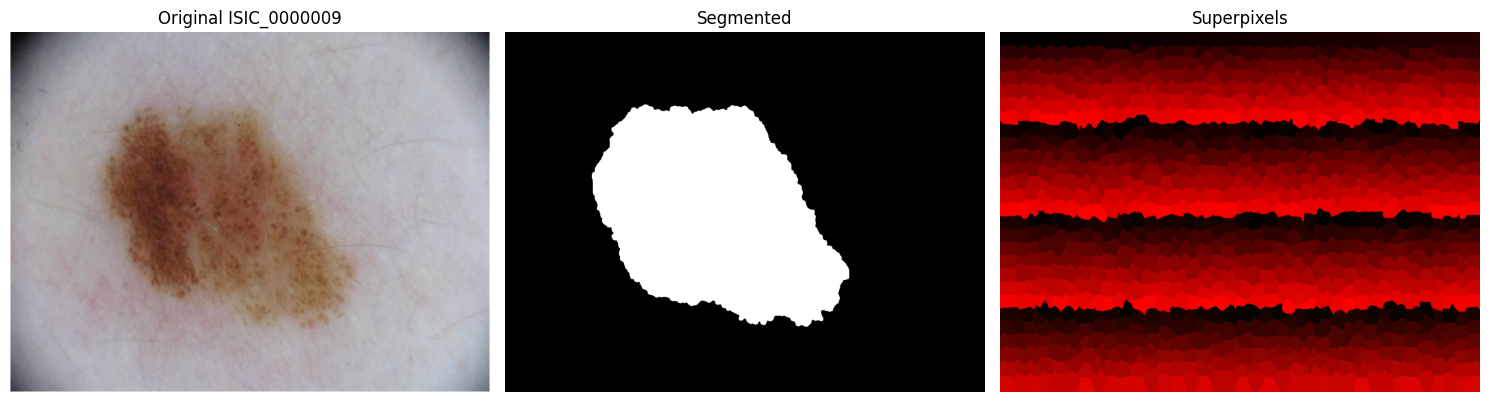


Unnamed: 0                           9
image_id                  ISIC_0000010
melanoma                             0
asymmetry                      0.00226
border_irregularity           1.545004
color_irregularity           27.529319
differential_structure        0.000016
Name: 9, dtype: object
{'std_hue': 2.802492463174869, 'std_saturation': 37.87508881225495, 'symmetry': 0.8115633569287672}


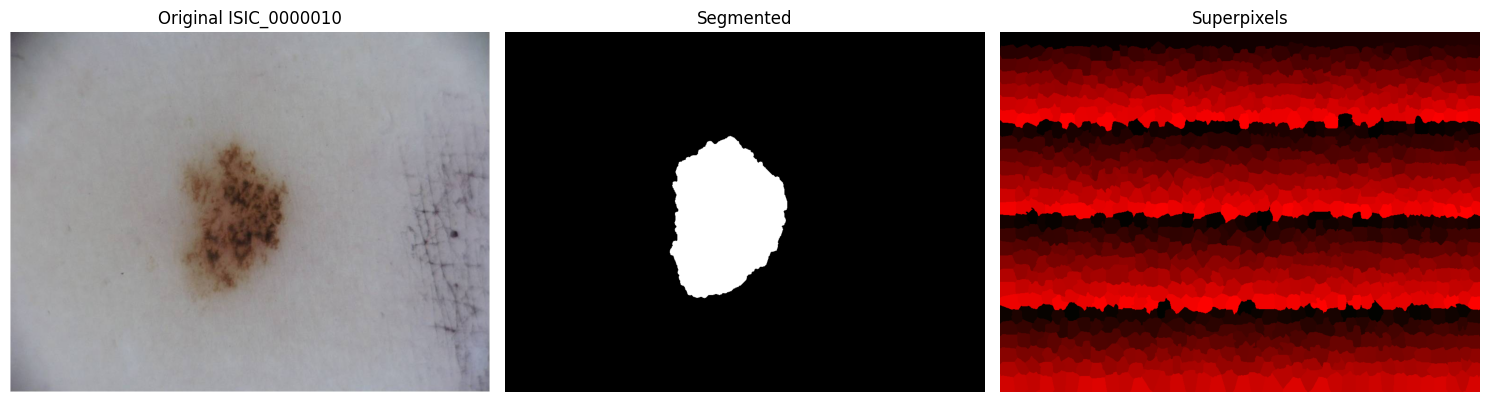


Unnamed: 0                          10
image_id                  ISIC_0000011
melanoma                             0
asymmetry                     0.001611
border_irregularity           1.636915
color_irregularity           24.461574
differential_structure        0.000007
Name: 10, dtype: object
{'std_hue': 3.480422697513192, 'std_saturation': 40.4866104064332, 'symmetry': 0.5633624753578469}


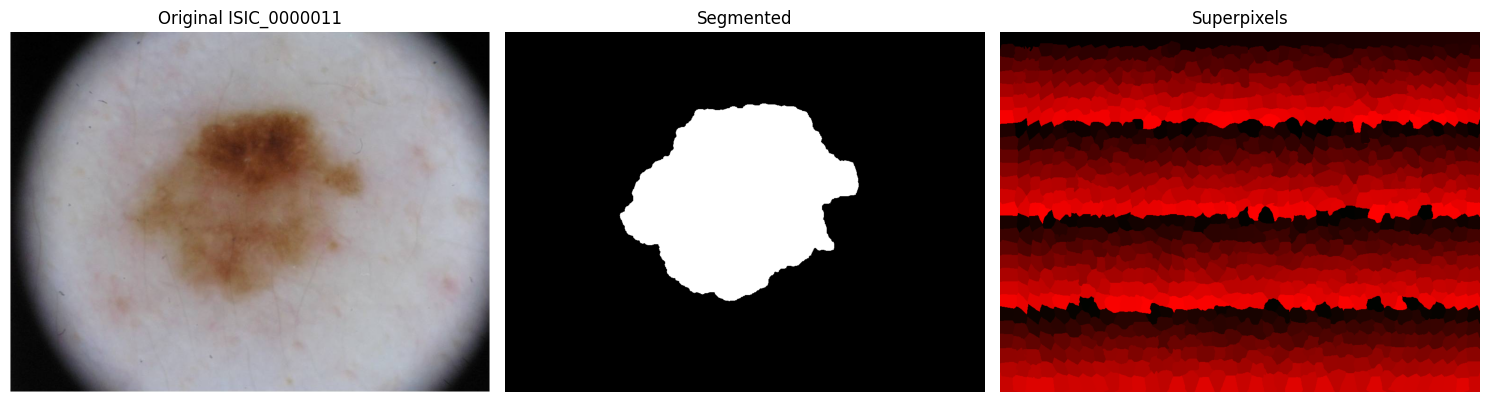


Unnamed: 0                          11
image_id                  ISIC_0000012
melanoma                             0
asymmetry                     0.002475
border_irregularity           1.464159
color_irregularity           21.724692
differential_structure        0.000026
Name: 11, dtype: object
{'std_hue': 66.16379567508726, 'std_saturation': 25.549666735286102, 'symmetry': 0.5144940653202659}


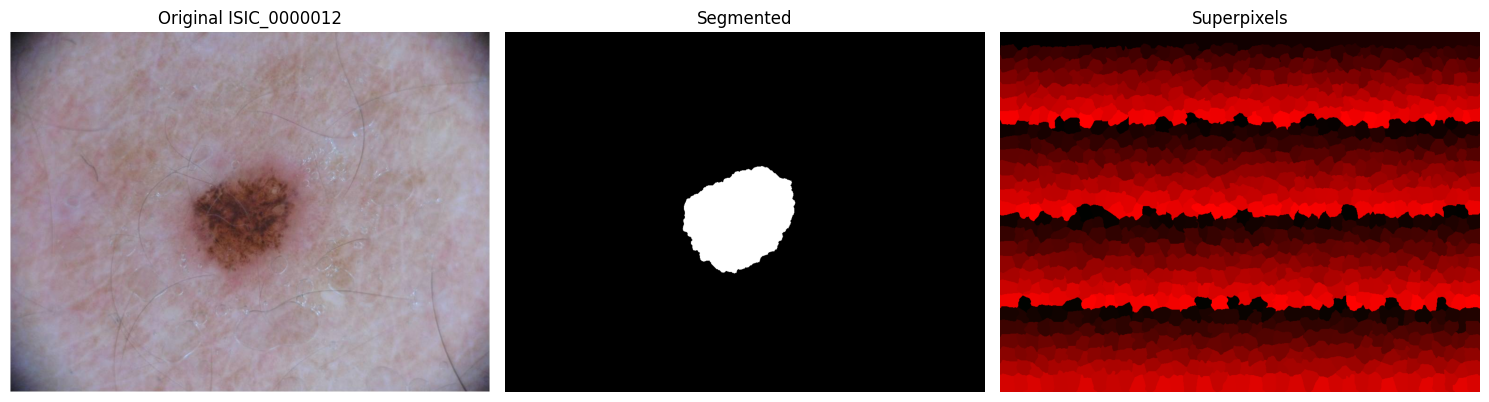

In [11]:
for i in range(10):
    img = non_melanoma.iloc[i]
    print(img)
    print(bjir2.get_features(dataset_path, img['image_id']))
    display_img(img['image_id'])
    print()

158308 170891 179407


0.9174642015083023

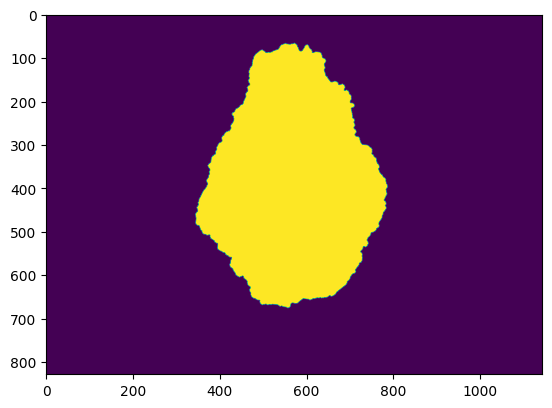

In [ ]:
# Author  : martabakmenari 
# NOTE: masi pake chatGPT dikit, tapi kebanyakan aku sendiri yg nulis,
#       soalnya GPT banyak ngawurnya.

import cv2
import numpy as np

def center_image(image, center):
    x, y   = image.shape
    cx, cy = center
    dx, dy = (x/2) - cx, (y/2) - cy
    pad_x = (int(dx), 0) if dx > 0 else (0, -int(dx))
    pad_y = (int(dy), 0) if dy > 0 else (0, -int(dy))
    return np.pad(image, (pad_x, pad_y), mode='constant', constant_values=0)

'''
algoritma: 
    "menengahkan" dan "merotasi" gambar sehingga nilai asymmetry indexnya sekecil mungkin
    dgn nilai center dan angle dari cv2.fitEllipse(). Lalu bandingkan seberapa banyak yg
    "overlap" dibanding luas asli, terhadap sumbu x dan y. Lalu rata-rata hasilnya.
note:
    Definisi ini aku buat sendiri soalnya ngga nemu referensi yang menstandarkan perhitungan
    indeks simetri dari gambar. Dari definisi ini, harusnya sih nilainya dari 0-1 dimana
    1 itu perfect symmetry (horizontal dan vertikal)
'''
def calculate_asymmetry(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Step 2: Find contours
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Step 3: Fit an ellipse to the largest contour
    ellipse = cv2.fitEllipse(largest_contour)
    (x, y), (MA, ma), angle = ellipse
    
    # Calculate the center of the ellipse
    cx, cy = int(x), int(y)

    rotation_matrix = cv2.getRotationMatrix2D((cx, cy), angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

    centered =  center_image(rotated_image, (cx, cy))
    plt.imshow(centered)
    
    flip_v = cv2.flip(centered, 0)
    flip_h = cv2.flip(centered, 1)

    overlap_v = np.sum((centered > 0) & (flip_v > 0))
    overlap_h = np.sum((centered > 0) & (flip_h > 0))

    area = np.sum(centered > 0)

    print(overlap_v, overlap_h, area)

    return (overlap_h + overlap_v) * 0.5 / area


    # # Recalculate the center after centering
    # cx_new, cy_new = max_dim // 2, max_dim // 2
    
    # # Step 6: Split the image in half vertically
    # half1 = centered_image[:, :max_dim // 2]
    # half2 = centered_image[:, max_dim // 2:]
    
    # # Step 7: Flip one half
    # half2_flipped = cv2.flip(half2, 1)
    
    # # Step 8: Calculate the overlap area
    # overlap_area = np.sum((half1 > 0) & (half2_flipped > 0))
    # total_area = np.sum(centered_image > 0)
    
    # # Calculate asymmetry index
    # asymmetry_index = overlap_area / total_area
    
    # print(f"Asymmetry Index: {asymmetry_index}")
    # return asymmetry_index

# Path to the segmented image
image_path = 'PROJECT_Data/ISIC_0000009_segmentation.png'
calculate_asymmetry(image_path)
